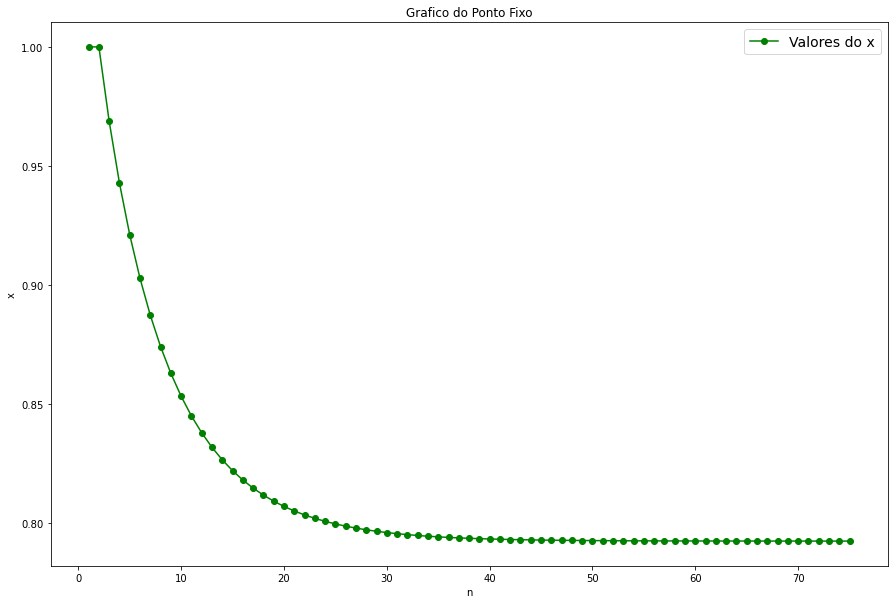


O gráfico 'Grafico do Ponto Fixo' foi salvo no seguinte diretório: C:\Users\fabio\Grafico_Trabalho2



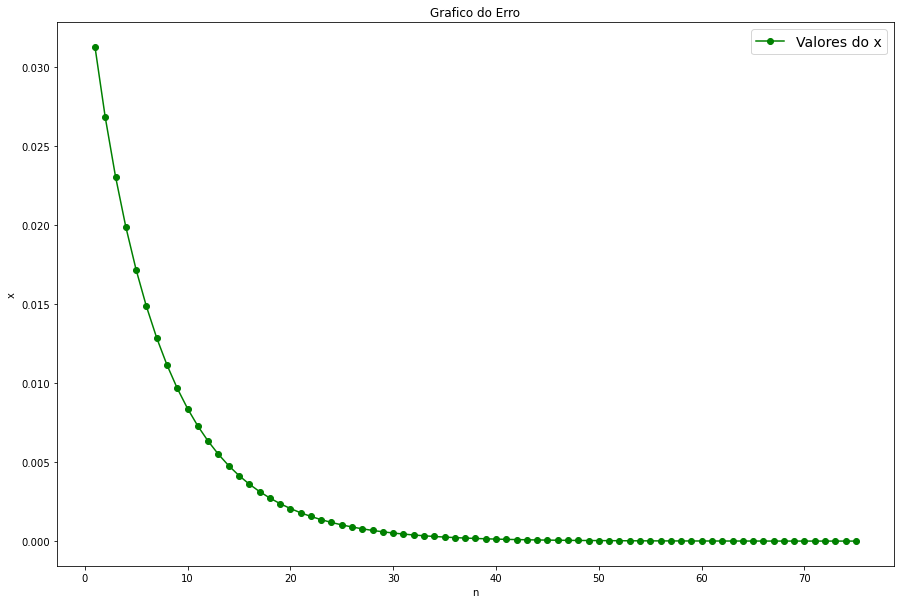


O gráfico 'Grafico do Erro' foi salvo no seguinte diretório: C:\Users\fabio\Grafico_Trabalho2



In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[24]:


import os
from os import mkdir
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
import math

class PontoFixo:
    
    def __init__ (self, x_0, nmax, tol):
        
        self.x_ant = x_0
        self.nmax = nmax
        self.tol = tol
        self.listx = []
        self.listerr = []
        self.x_prox = 0
        self.c = -1/32
        self.xerr = 0
    
    def Erro(self):
        
        self.xerr = (self.x_prox - self.x_ant)/self.x_ant
        
        self.xerr = abs(self.xerr)
        
        self.listerr.append(self.xerr)
        
    
    def Calcula_xProx(self):
        
        self.x_prox = self.x_ant + self.c*(4**self.x_ant - 3)
        
    
    def Pfixo (self):
        
        self.listx.append(self.x_ant)
        
        cont = 0
        
        self.Calcula_xProx()
            
        self.Erro()
        
        while ((cont<self.nmax) and (self.xerr>self.tol)):
            
            self.listx.append(self.x_ant)
            
            self.x_ant = self.x_prox
            
            self.Calcula_xProx()
            
            self.Erro()
            
            cont+= 1
            
        
        return self.listx, self.listerr
    
class Grafico:
    
    def __init__ (self, lista, titulo = None, nomeY = None, nomeX = None, valor = None):
        
        self.tamanho = len(lista)
        self.lista = lista
        self.eixoX = None
        self.objeto = None
        self.titulo = titulo
        self.nomeY = nomeY
        self.nomeX = nomeX
        self.cwd = None
        self.sinal = None
        self.valor = [valor]
        self.label = None
    
    def Eixo_X (self):
        
        self.eixoX = np.arange(1, (self.tamanho+1), 1)
        
        #print(self.eixoX)
        
        return self.eixoX
    
    def CriaPasta (self):
        
        self.cwd = os.getcwd()
        self.cwd = self.cwd +"\Grafico_Trabalho2"
        self.sinal = os.path.isdir(self.cwd)
        
        if(self.sinal==False):
            os.mkdir(self.cwd)
    
    def grafico (self):
        
        self.objeto = self.Eixo_X()
        plt.figure(figsize = (15, 10))
        plt.plot(self.objeto, self.lista, 'g-o')
        
        if(self.valor[0] != None):
            plt.plot(self.objeto, self.tamanho*self.valor, 'r', label = 'Pi')
            self.label = 'Pi'
        
        plt.title(self.titulo)
        plt.xlabel(self.nomeX)
        plt.ylabel(self.nomeY)
        plt.legend(['Valores do ' + self.nomeY, self.label], loc = 'best', fontsize = 14)

        self.CriaPasta()
        
        plt.savefig(self.cwd + "/" + self.titulo + ".png", format = "png")
        #plt.savefig(self.cwd + "/" + self.titulo + ".jpeg", format = "jpeg")
        #plt.savefig("C:/Users/Fabio/Documents/Master_in_Modelagem_Computacional/GA-018-Metodos_numericos/Trabalhos/Trabalho1/Graficos/"+self.titulo+".png", format = "png")
        plt.show()
        plt.close()
        
        print("""\nO gráfico '%s' foi salvo no seguinte diretório: %s\n"""%(self.titulo, self.cwd))

class Arquivo:
    
    def __init__ (self, nome, coluna1, coluna2, diretorio, titulo1 = None, titulo2 = None):
        
        self.nome = nome
        self.coluna1 = coluna1
        self.coluna2 = coluna2
        self.titulo1 = titulo1
        self.titulo2 = titulo2
        self.endereco = diretorio
        self.diretorio = self.endereco + '/' + self.nome + '.txt'
    
    def arquivo (self):
        
        arq = open(self.diretorio, 'w')
        if(self.titulo1 != None) and (self.titulo2 != None):
            
            arq.write("an\t\t%s\t\t\t%s\n\n" %(self.titulo1, self.titulo2))
            
        arq.close()
        
        arq1 = open(self.diretorio, 'a')
        
        for i in range(len(self.coluna1)):
            
            arq1.write("a%d\t\t%.20f\t\t%.20f\n" %((i+1), self.coluna1[i], self.coluna2[i]))
            
        arq1.close()
        
        print("\nOs valores foram salvos no arquivo de nome '%s' seguinte diretorio: %s\n" %(self.nome, self.endereco))
            
        
        
    
#Programa principal:

x_0 = 1
nmax = 100
tol = 1.0e-6

listx = None
listerr = None

pfixo = PontoFixo(x_0, nmax, tol)

listx,listerr = pfixo.Pfixo()


grafico_x = Grafico(listx, "Grafico do Ponto Fixo", "x", "n")
grafico_x.grafico()

grafico_e = Grafico(listerr, "Grafico do Erro", "x", "n")
grafico_e.grafico()

#Problema 2:


# In[ ]:





# In[ ]:

#acos

#+5524988160394
#colocar o gráfico do erro para escala logaritmica